# Aggregate extraced time across multiple traces

1. Input parameters: directory with JSON traces, trace name pattern, (multiple) event patterns.  
   a. In trace name pattern, use one group for the varying parameter value (MBS).
2. For each event pattern, extract event time from all traces one by one using parseOneTrace script.
3. Aggregate values into one DF along with the varying parameter value extracted from the trace filename.


In [2]:
import os
import pandas as pd
import subprocess
import re
import matplotlib
from matplotlib import pyplot as plt

## Set input parameters

In [3]:
logdir = 'logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729'
trace_name_pattern = 'dnnmark_mouse.cont_conf_convolution_block_shape([0-9\-]+)_bs([0-9]+)_algospytorch_iter10_00\.json'
# event_patterns = ['.*batchnormalization.*','.*sgemm.*', '.*convolution.*']

## Read trace files

In [7]:
list_command = "ls -1 " + logdir
files = []
shapes = []
mbs = []
proc = subprocess.Popen(list_command.split(" "),
                        stdout=subprocess.PIPE,
                        stderr=subprocess.STDOUT,
                        encoding='utf8')
for line in iter(proc.stdout.readline, ''):
    line = line.strip(" \n")
    print(line, '...', end='')
    m = re.match(trace_name_pattern, line)
    if m:
        print('matched')
        files.append(os.path.join(logdir, line))
        shapes.append(m.group(1))
        mbs.append(m.group(2))
    else:
        print('MISSED')

print('{} files in {}'.format(len(files), logdir))
for f, s, m in zip(files, shapes, mbs):
    print(f[-60:], s, m)

README ...MISSED
dnnmark_mouse.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs10_algospytorch_iter10_00.csv ...MISSED
dnnmark_mouse.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs10_algospytorch_iter10_00.json ...matched
dnnmark_mouse.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs10_algospytorch_iter10_00.log ...MISSED
dnnmark_mouse.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs10_algospytorch_iter10_00.qdrep ...MISSED
dnnmark_mouse.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs12_algospytorch_iter10_00.csv ...MISSED
dnnmark_mouse.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs12_algospytorch_iter10_00.json ...matched
dnnmark_mouse.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs12_algospytorch_iter10_00.log ...MISSED
dnnmark_mouse.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs12_algospytorch_iter10_00.qdrep ...MISSED
dnnmark_mouse.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs15_algospytorch_

dnnmark_mouse.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs7_algospytorch_iter10_00.csv ...MISSED
dnnmark_mouse.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs7_algospytorch_iter10_00.json ...matched
dnnmark_mouse.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs7_algospytorch_iter10_00.log ...MISSED
dnnmark_mouse.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs7_algospytorch_iter10_00.qdrep ...MISSED
dnnmark_mouse.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs8_algospytorch_iter10_00.csv ...MISSED
dnnmark_mouse.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs8_algospytorch_iter10_00.json ...matched
dnnmark_mouse.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs8_algospytorch_iter10_00.log ...MISSED
dnnmark_mouse.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs8_algospytorch_iter10_00.qdrep ...MISSED
dnnmark_mouse.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs9_algospytorch_iter10_00.csv ...MISSED
dnnmark_mouse.cont_c

ock_shape14-14-256-256-3-1-1_bs5_algospytorch_iter10_00.json 14-14-256-256-3-1-1 5
ock_shape14-14-256-256-3-1-1_bs6_algospytorch_iter10_00.json 14-14-256-256-3-1-1 6
ock_shape14-14-256-256-3-1-1_bs7_algospytorch_iter10_00.json 14-14-256-256-3-1-1 7
ock_shape14-14-256-256-3-1-1_bs8_algospytorch_iter10_00.json 14-14-256-256-3-1-1 8
ock_shape14-14-256-256-3-1-1_bs9_algospytorch_iter10_00.json 14-14-256-256-3-1-1 9
ck_shape14-14-512-512-3-1-2_bs10_algospytorch_iter10_00.json 14-14-512-512-3-1-2 10
ck_shape14-14-512-512-3-1-2_bs12_algospytorch_iter10_00.json 14-14-512-512-3-1-2 12
ck_shape14-14-512-512-3-1-2_bs15_algospytorch_iter10_00.json 14-14-512-512-3-1-2 15
ck_shape14-14-512-512-3-1-2_bs20_algospytorch_iter10_00.json 14-14-512-512-3-1-2 20
ck_shape14-14-512-512-3-1-2_bs30_algospytorch_iter10_00.json 14-14-512-512-3-1-2 30
ck_shape14-14-512-512-3-1-2_bs40_algospytorch_iter10_00.json 14-14-512-512-3-1-2 40
ck_shape14-14-512-512-3-1-2_bs50_algospytorch_iter10_00.json 14-14-512-512-3-1-2 

In [8]:
event_patterns = ['.*batchnormalization.*','.*activation.*', '.*convolution.*']
results = None
# maxfiles = 10
# filecounter = 0
convert_traces = False
for m, s, tracefile in zip(mbs, shapes, files):
    events = ' '.join(event_patterns)
    if convert_traces:
        # Run
        # python3 parseOneTrace.py -f $tracefile --events $events
        command = 'python3 parseOneTrace.py -f {} --events {}'.format(tracefile, events)
        print(command)
        p = subprocess.run(command.split(' '), stdin=subprocess.PIPE, stderr=subprocess.PIPE,
                           bufsize=0, shell=False)
        if p.returncode == 0:
            print('Finished OK')
            pass
        else:        
            print(p.stdout.decode('utf-8'))
            print('ERROR')
            print(p.stderr.decode('utf-8'))
    # Read data from CSV file
    directory = os.path.dirname(tracefile)
    csvfile = ('.').join(os.path.basename(
        tracefile).split('.')[:-1])  # Filename without extension
    csvfile = csvfile + '.csv'
    csvfile = os.path.join(directory, csvfile)
    print('Reading {}'.format(csvfile))    
    df_ = pd.read_csv(csvfile)
    df_['shape'] = s
    df_['batch'] = m
#     display(df_.head())
    if results is None:
        results = df_
    else:
        results = results.append(df_, ignore_index=True)
        
#     filecounter += 1
#     if filecounter >= maxfiles:
#         break
        
results['batch'] = results['batch'].astype(int)
results.sample(n=2)

Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs10_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs12_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs15_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs20_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs30_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnn

Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs30_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs40_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs50_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs5_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs6_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.c

Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape28-28-128-512-1-0-1_bs6_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape28-28-128-512-1-0-1_bs7_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape28-28-128-512-1-0-1_bs8_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape28-28-128-512-1-0-1_bs9_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs10_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.con

Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs12_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs15_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs20_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs30_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs40_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse

Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs40_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs50_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs5_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs6_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs7_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_co

Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs6_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs7_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs8_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs9_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf_convolution_block_shape7-7-512-512-3-1-1_bs10_algospytorch_iter10_00.csv
Reading logs/mouse.cont/dnnmark_resnet50_test_composed_model_microseries_20200729/dnnmark_mouse.cont_conf

,API event,NVTX,duration,shape,batch
68,cudnnBatchNormalizationForwardTraining,Forward,0.003469,14-14-1024-2048-1-0-2,7
1904,cudnnActivationBackward,Backward,0.000167,7-7-512-512-3-1-1,6


In [9]:
print(results.dtypes)
print(results.shape[0])
results.head()

API event     object
NVTX          object
duration     float64
shape         object
batch          int64
dtype: object
1932


,API event,NVTX,duration,shape,batch
0,cudnnActivationBackward,Backward,0.001005,14-14-1024-2048-1-0-2,10
1,cudnnActivationForward,Forward,0.000704,14-14-1024-2048-1-0-2,10
2,cudnnBatchNormalizationBackward,Backward,0.002997,14-14-1024-2048-1-0-2,10
3,cudnnBatchNormalizationForwardTraining,Forward,0.004341,14-14-1024-2048-1-0-2,10
4,cudnnConvolutionBackwardData,Backward,0.024406,14-14-1024-2048-1-0-2,10


## Read convolution configuration (ResNet50)

In [10]:
CNNconfig = pd.read_csv('../mlbenchmarks/DNNMark/ConvConfigs/resnet50.csv')
# Strip whitespaces from column names
CNNconfig.rename(columns=lambda x: x.strip(), inplace=True)
# print(CNNconfig.columns)
CNNconfig['shape'] = CNNconfig['image height'].astype(str) + "_" + CNNconfig[
    'image width'].astype(str) + "_" + CNNconfig['input channels'].astype(
        str) + "_" + CNNconfig['output channels'].astype(str) + "_" + CNNconfig[
            'kernel size'].astype(str) + "_" + CNNconfig['padding'].astype(
                str) + '_' + CNNconfig['stride'].astype(str)
CNNconfig = CNNconfig.groupby(CNNconfig.columns.tolist(),as_index=False).size().reset_index().rename(columns={0:'count'})
CNNconfig = CNNconfig[['shape','count']]
CNNconfig.head()

,shape,count
0,7_7_512_512_3_1_1,2
1,7_7_512_2048_1_0_1,3
2,7_7_2048_512_1_0_1,2
3,14_14_256_256_3_1_1,5
4,14_14_256_1024_1_0_1,6


In [11]:
iterations = 10
times = results.copy()
print('Have {} records'.format(times.shape[0]))
print('API events:',times['API event'].unique())
# Count duplicate entries
times_ = times.groupby(['API event', 'shape', 'batch'], as_index=False).count()
display(times_[times_['duration'] > 1])
# No duplicates

# Add shape counter
# Correct shape format
times['shape'] = times['shape'].str.replace('-','_')
print('Unique shapes in logs',times['shape'].unique())
# print(CNNconfig['shape'].unique())
times = pd.merge(times, CNNconfig, on=['shape'], how='inner')
print('Merged with shape count:')
display(times.head())

# Multiply time by the number of shapes in the CNN model
times['time'] = times['duration'] * times['count']
times.drop(['duration','count'], axis=1, inplace=True)


# Cannot distinguish iterations,
# sum time of all API events, and devide by the number of iterations
times = times.groupby(['API event', 'batch'], as_index=False).sum()
display(times.sample(n=5))
# Average between iterations
# Check number of entries
times['time'] = times['time'] / iterations

# Have only one iteration for mbs50
times = times.groupby(['API event', 'batch'], as_index=False).mean()
times['batch'] = times['batch'].astype(int)
times.head()

Have 1932 records
API events: ['cudnnActivationBackward' 'cudnnActivationForward'
 'cudnnBatchNormalizationBackward'
 'cudnnBatchNormalizationForwardTraining' 'cudnnConvolutionBackwardData'
 'cudnnConvolutionBackwardFilter' 'cudnnConvolutionForward']


,API event,shape,batch,NVTX,duration


Unique shapes in logs ['14_14_1024_2048_1_0_2' '14_14_1024_256_1_0_1' '14_14_1024_512_1_0_1'
 '14_14_256_1024_1_0_1' '14_14_256_256_3_1_1' '14_14_512_512_3_1_2'
 '224_224_3_64_7_3_2' '28_28_128_128_3_1_1' '28_28_128_512_1_0_1'
 '28_28_256_256_3_1_2' '28_28_512_1024_1_0_2' '28_28_512_128_1_0_1'
 '28_28_512_256_1_0_1' '56_56_128_128_3_1_2' '56_56_256_128_1_0_1'
 '56_56_256_512_1_0_2' '56_56_256_64_1_0_1' '56_56_64_256_1_0_1'
 '56_56_64_64_1_0_1' '56_56_64_64_3_1_1' '7_7_2048_512_1_0_1'
 '7_7_512_2048_1_0_1' '7_7_512_512_3_1_1']
Merged with shape count:


,API event,NVTX,duration,shape,batch,count
0,cudnnActivationBackward,Backward,0.001005,14_14_1024_2048_1_0_2,10,1
1,cudnnActivationForward,Forward,0.000704,14_14_1024_2048_1_0_2,10,1
2,cudnnBatchNormalizationBackward,Backward,0.002997,14_14_1024_2048_1_0_2,10,1
3,cudnnBatchNormalizationForwardTraining,Forward,0.004341,14_14_1024_2048_1_0_2,10,1
4,cudnnConvolutionBackwardData,Backward,0.024406,14_14_1024_2048_1_0_2,10,1


,API event,batch,time
15,cudnnActivationForward,8,0.060769
19,cudnnActivationForward,15,0.113142
24,cudnnBatchNormalizationBackward,5,0.083287
52,cudnnConvolutionBackwardData,9,0.466363
18,cudnnActivationForward,12,0.090368


,API event,batch,time
0,cudnnActivationBackward,5,0.005541
1,cudnnActivationBackward,6,0.006618
2,cudnnActivationBackward,7,0.007706
3,cudnnActivationBackward,8,0.008813
4,cudnnActivationBackward,9,0.009883


API event,cudnnActivationBackward,cudnnActivationForward,cudnnBatchNormalizationBackward,cudnnBatchNormalizationForwardTraining,cudnnConvolutionBackwardData,cudnnConvolutionBackwardFilter,cudnnConvolutionForward
batch,,,,,,,
5,0.005541,0.003807,0.008329,0.014336,0.031554,0.041691,0.024979
6,0.006618,0.004560,0.009770,0.015579,0.038559,0.046174,0.031848
7,0.007706,0.005314,0.010958,0.018276,0.042367,0.051283,0.036345
8,0.008813,0.006077,0.012360,0.018097,0.046918,0.054141,0.040975
9,0.009883,0.006808,0.014340,0.020901,0.046636,0.055066,0.039993


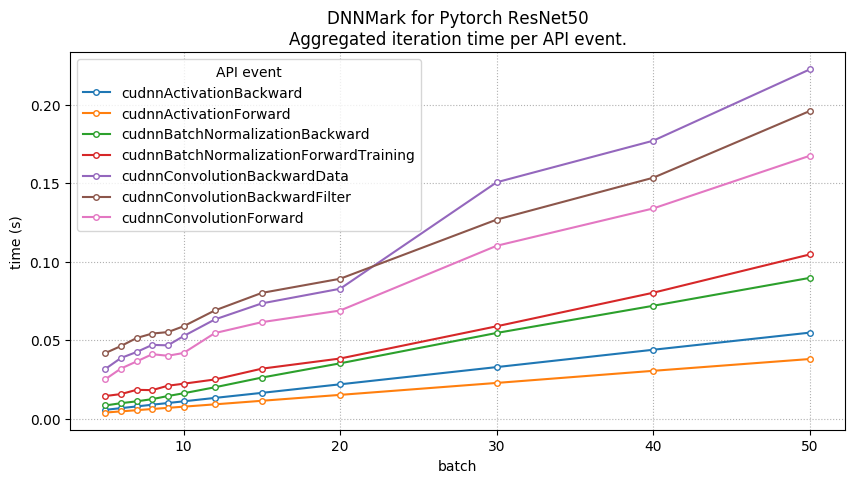

In [14]:
timesT = times.pivot_table(columns='API event', index='batch', values='time',aggfunc='sum')
display(timesT.head())
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
timesT.plot(marker='o', ms=4, mfc='w', ax=ax)
ax.grid(ls=':', which='major')
ax.grid(ls=':', lw=0.5, which='minor')
plt.title('DNNMark for Pytorch ResNet50\nAggregated iteration time per API event.')
ax.set_ylabel('time (s)')
plt.show()

In [90]:
# Group API events by type
def getType(e):
    types = {'RELU': 'activation',
             'conv': 'conv',
             'BN': 'batchnormalization'}
    for k, v in types.items():
        m = re.search(v, e.lower())
        if m is not None:
            return k
    return 'other'

In [91]:
# Sum time for same type events
times['type'] = times['API event'].apply(getType)
times = times[(times['type'] != 'other')]
times = times.groupby(['type', 'batch'], as_index=False).sum()
times['batch'] = times['batch'].astype(int)
times.head()
times.sample(n=7)

,type,batch,time
3,BN,8,0.030457
4,BN,9,0.035240
5,BN,10,0.038272
27,conv,8,0.142034
21,RELU,30,0.055456
10,BN,40,0.151977
12,RELU,5,0.009347


In [92]:
timesT = times.pivot_table(columns='type', index='batch', values='time')
timesT.head()

type,BN,RELU,conv
batch,,,
5,0.022664,0.009347,0.098223
6,0.025349,0.011178,0.116581
7,0.029234,0.013020,0.129995
8,0.030457,0.014890,0.142034
9,0.035240,0.016692,0.141695


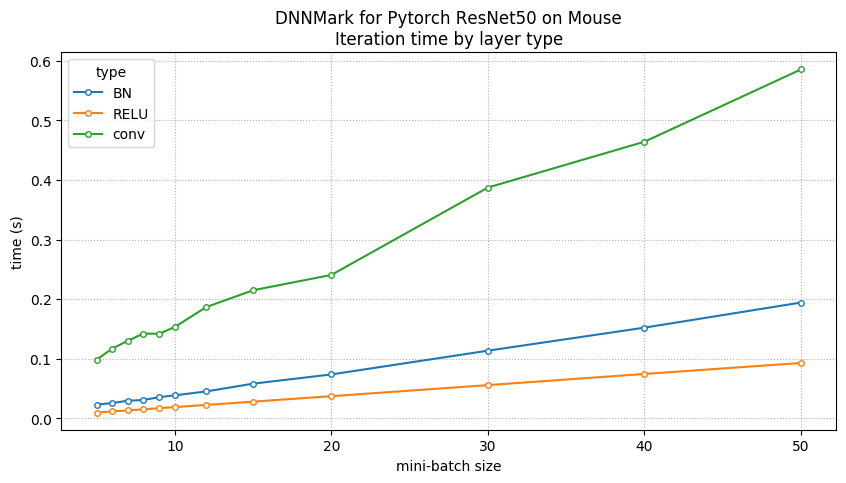

In [93]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
timesT.plot(marker='o', ms=4, mfc='w', ax=ax)
ax.grid(ls=':', which='major')
ax.grid(ls=':', lw=0.5, which='minor')
ax.set_xlabel('mini-batch size')
ax.set_ylabel('time (s)')
plt.title('DNNMark for Pytorch ResNet50 on Mouse\nIteration time by layer type')
plt.show()